## Prerequisites

### Download required libraries

In [1]:
!pip install librosa

  Using cached SoundFile-0.10.3.post1-py2.py3.cp26.cp27.cp32.cp33.cp34.cp35.cp36.pp27.pp32.pp33-none-win_amd64.whl (689 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
  Created wheel for audioread: filename=audioread-2.1.9-py3-none-any.whl size=23145 sha256=e55e7cde04f5d6d2b8870a0ecf70f6053223cf4f70acd184520ec6f85a400f72
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\49\5a\e4\df590783499a992a88de6c0898991d1167453a3196d0d1eeb7
  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320723 sha256=54d67eb47d189796599181f0eab2a034d51c09316d56275c86fd09f2c13a16eb
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\6f\d1\5d\f13da53b1dcbc2624ff548456c9ffb526c914f53c12c318bb4
Successfully built audioread resampy


In [10]:
!pip install ipython

### Import required libraries

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as ipd
import librosa
import librosa.display
import numpy as np
from tqdm import tqdm
import os
from sklearn.model_selection import train_test_split

## Librosa VS SciPy

In [2]:
filename = 'Dataset/fold1/7061-6-0-0.wav'

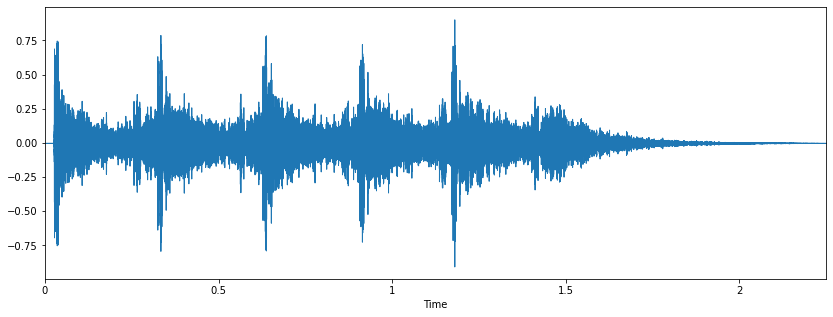

In [3]:
plt.figure(figsize=(14,5))
data, sample_rate = librosa.load(filename)
librosa.display.waveplot(data, sr=sample_rate)
ipd.Audio(filename)

In [22]:
#Sample rate = It defines how many times per second a sound is sampled
#standard sample rate is 44.1 KHz (44100 HZ)
print("Sample rate of sound: ",sample_rate)

Sample rate of sound:  22050


In [9]:
from scipy.io import wavfile as wav
wav_sample_rate, wave_audio = wav.read(filename)

In [26]:
print("Original Sample rate of sound: ",wav_sample_rate)

Original Sample rate of sound:  44100


In [28]:
wave_audio

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [1, 0],
       [1, 1],
       [0, 0]], dtype=int16)

In [29]:
data

array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0231203e-05,
       2.3116412e-05, 0.0000000e+00], dtype=float32)

In [8]:
stereo_signal_path = 'Dataset/fold5/100263-2-0-3.wav' 
librosa_stereo_data, librosa_sample_rate = librosa.load(stereo_signal_path)

In [9]:
print(librosa_stereo_data)

[ 0.00330576  0.00468387  0.00360455 ... -0.0037562  -0.00348641
 -0.00356705]


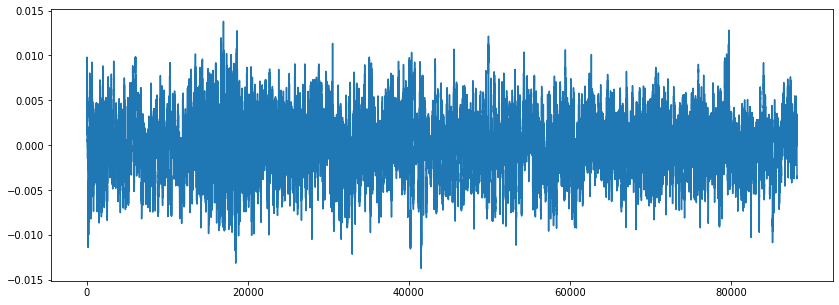

In [12]:
plt.figure(figsize=(14,5))
plt.plot(librosa_stereo_data)
ipd.Audio(stereo_signal_path)

In [14]:
stereo_scipy_sample_rate, stereo_scipy_data = wav.read(stereo_signal_path)
stereo_scipy_data

array([[ 194,  100],
       [ 179,  113],
       [ 160,  124],
       ...,
       [-143,  -87],
       [-134,  -91],
       [-110,  -98]], dtype=int16)

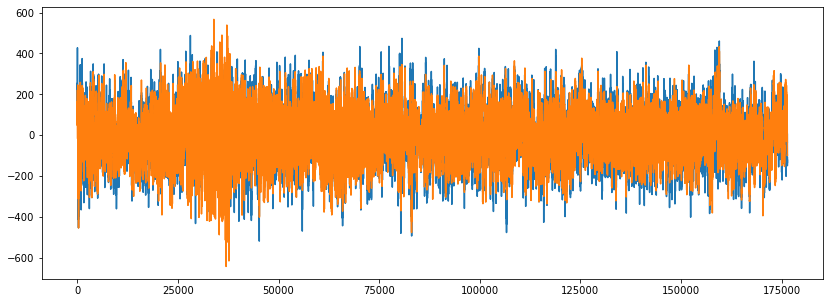

In [15]:
plt.figure(figsize=(14,5))
plt.plot(stereo_scipy_data)

## Dataset Preprocessing

In [4]:
import pandas as pd

### 1. Import dataset

In [5]:
audio_dataset_path = 'Dataset/'
metadata = pd.read_csv('Dataset/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


### 2. Check whether the dataset is imbalanced

In [6]:
metadata['class'].value_counts()

street_music        1000
children_playing    1000
engine_idling       1000
drilling            1000
air_conditioner     1000
dog_bark            1000
jackhammer          1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

## MFCC

In [10]:
mfccs = librosa.feature.mfcc(y=librosa_stereo_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [11]:
mfccs

array([[-4.45197296e+02, -4.47219299e+02, -4.49755127e+02, ...,
        -4.77412781e+02, -4.74241730e+02, -4.82704987e+02],
       [ 1.12513969e+02,  1.11970383e+02,  1.12244164e+02, ...,
         1.12045395e+02,  1.12248581e+02,  1.05560913e+02],
       [-1.58260956e+01, -2.30021858e+01, -3.12500191e+01, ...,
        -9.15442085e+00, -1.03232279e+01, -7.39410734e+00],
       ...,
       [-7.82766485e+00, -5.03880405e+00, -4.48165464e+00, ...,
        -1.90691590e-01,  4.34143829e+00,  1.00339069e+01],
       [-1.91763425e+00, -8.02737713e-01, -1.20930421e+00, ...,
        -1.23643339e-01,  2.90545225e-02,  9.22017097e-01],
       [-3.88130605e-01,  3.09317827e-01,  6.72155762e+00, ...,
        -2.33736658e+00, -4.25180149e+00, -2.31322765e+00]], dtype=float32)

In [12]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    return mfccs_scaled_features

In [30]:
extracted_features = []
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels = row["class"]
    data = features_extractor(file_name)
    extracted_features.append([data, final_class_labels])

8324it [16:23, 13.49it/s]C:\Users\USER\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1103
  warnings.warn(
C:\Users\USER\anaconda3\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1523
  warnings.warn(
8732it [17:08,  8.49it/s]


### 3. Converting extracted_features to pandas dataframe

In [31]:
extracted_features_df = pd.DataFrame(extracted_features, columns=['feature', 'class'])
extracted_features_df.head()

,feature,class
0,"[-215.79301, 71.66612, -131.81377, -52.091328,...",dog_bark
1,"[-424.68677, 110.56227, -54.148235, 62.01073, ...",children_playing
2,"[-459.56467, 122.800354, -47.92471, 53.265694,...",children_playing
3,"[-414.55377, 102.896904, -36.66495, 54.18041, ...",children_playing
4,"[-447.397, 115.0954, -53.809113, 61.608585, 1....",children_playing


In [34]:
extracted_features_df.to_csv('file1.csv')

In [45]:
df= pd.read_csv('file1.csv')

### 4. Split the dataset into independent and dependent dataset

In [46]:
X = np.array(df['feature'].tolist())
Y = np.array(df['class'].tolist())

In [47]:
X.shape

(8732,)

### 5. Label Encoding

In [48]:
# Y = np.array(pd.get_dummies(Y))
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
Y = to_categorical(labelencoder.fit_transform(Y))

In [49]:
Y.shape

(8732, 10)

In [50]:
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

### 6. Split the dataset for train and test model

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [19]:
print("X_train shape: ",X_train.shape,"\nX_test shape: ",X_test.shape,"\nY_train shape: ",Y_train.shape,"\nY_test shape: ",Y_test.shape)

X_train shape:  (6985, 40) 
X_test shape:  (1747, 40) 
Y_train shape:  (6985, 10) 
Y_test shape:  (1747, 10)


## Model creation

### 1. import tensorflow library

In [22]:
import tensorflow as tf
print(tf.__version__)

2.3.1


### 2. Import required libraries

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

### 3. Create ANN model

In [43]:
num_labels = Y.shape[1]

In [44]:
model = Sequential()
### First layer with 100 neurons
model.add(Dense(100, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

### Second layer with 200 neurons
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))

### Third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

### Final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4100      
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               2

In [25]:
model.compile(loss='categorical_crossentropy', metrics='accuracy', optimizer='adam')

In [26]:
## training my model
num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdfs', verbose=1, save_best_only=True)
start = datetime.now()
model.fit(X_train, Y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, Y_test), callbacks=[checkpointer])

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
209/219 [===========================>..] - ETA: 0s - loss: 11.5939 - accuracy: 0.1172
Epoch 00001: val_loss improved from inf to 2.29294, saving model to saved_models\audio_classification.hdfs
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_models\audio_classification.hdfs\assets
219/219 [==============================] - 4s 16ms/step - loss: 11.2349 - accuracy: 0.1175 - val_loss: 2.2929 - val_accuracy: 0.1122
Epoch 2/100
213/219 [============================>.] - ETA: 0s - loss: 2.5597 - accuracy: 0.1202
Epoch 00002: val_loss improved from 2.29294 to 2.28180, saving model to saved_models\audio_classification.hdfs
INFO:tensorflow:Assets written to: saved_models\audio_classification.hdfs\assets
219/219 [==============================] - 3s 13ms/step - 

Epoch 19/100
206/219 [===========================>..] - ETA: 0s - loss: 1.7137 - accuracy: 0.3703
Epoch 00019: val_loss improved from 1.56548 to 1.54047, saving model to saved_models\audio_classification.hdfs
INFO:tensorflow:Assets written to: saved_models\audio_classification.hdfs\assets
219/219 [==============================] - 5s 25ms/step - loss: 1.7157 - accuracy: 0.3688 - val_loss: 1.5405 - val_accuracy: 0.4906
Epoch 20/100
212/219 [============================>.] - ETA: 0s - loss: 1.6891 - accuracy: 0.3872
Epoch 00020: val_loss improved from 1.54047 to 1.49287, saving model to saved_models\audio_classification.hdfs
INFO:tensorflow:Assets written to: saved_models\audio_classification.hdfs\assets
219/219 [==============================] - 5s 22ms/step - loss: 1.6885 - accuracy: 0.3883 - val_loss: 1.4929 - val_accuracy: 0.4648
Epoch 21/100
214/219 [============================>.] - ETA: 0s - loss: 1.6392 - accuracy: 0.4065
Epoch 00021: val_loss improved from 1.49287 to 1.44521, sa

Epoch 00063: val_loss improved from 0.85623 to 0.84550, saving model to saved_models\audio_classification.hdfs
INFO:tensorflow:Assets written to: saved_models\audio_classification.hdfs\assets
219/219 [==============================] - 5s 21ms/step - loss: 1.0337 - accuracy: 0.6584 - val_loss: 0.8455 - val_accuracy: 0.7350
Epoch 64/100
208/219 [===========================>..] - ETA: 0s - loss: 1.0407 - accuracy: 0.6523
Epoch 00064: val_loss did not improve from 0.84550
219/219 [==============================] - 1s 3ms/step - loss: 1.0366 - accuracy: 0.6527 - val_loss: 0.8750 - val_accuracy: 0.7161
Epoch 65/100
219/219 [==============================] - ETA: 0s - loss: 1.0360 - accuracy: 0.6485
Epoch 00065: val_loss did not improve from 0.84550
219/219 [==============================] - 1s 4ms/step - loss: 1.0360 - accuracy: 0.6485 - val_loss: 0.8560 - val_accuracy: 0.7207
Epoch 66/100
214/219 [============================>.] - ETA: 0s - loss: 1.0138 - accuracy: 0.6557
Epoch 00066: val_l

216/219 [============================>.] - ETA: 0s - loss: 0.9862 - accuracy: 0.6657
Epoch 00088: val_loss did not improve from 0.76501
219/219 [==============================] - 1s 4ms/step - loss: 0.9845 - accuracy: 0.6661 - val_loss: 0.8248 - val_accuracy: 0.7241
Epoch 89/100
217/219 [============================>.] - ETA: 0s - loss: 0.9805 - accuracy: 0.6711
Epoch 00089: val_loss did not improve from 0.76501
219/219 [==============================] - 1s 4ms/step - loss: 0.9819 - accuracy: 0.6712 - val_loss: 0.8010 - val_accuracy: 0.7567
Epoch 90/100
210/219 [===========================>..] - ETA: 0s - loss: 0.9673 - accuracy: 0.6778
Epoch 00090: val_loss did not improve from 0.76501
219/219 [==============================] - 1s 4ms/step - loss: 0.9713 - accuracy: 0.6763 - val_loss: 0.7836 - val_accuracy: 0.7510
Epoch 91/100
212/219 [============================>.] - ETA: 0s - loss: 0.9585 - accuracy: 0.6779
Epoch 00091: val_loss did not improve from 0.76501
219/219 [===============

In [27]:
test_accuracy = model.evaluate(X_test, Y_test, verbose=0)
print(test_accuracy[1])

0.7567257881164551


In [29]:
X_test[1]

array([-466.1843    ,    1.5388278 ,  -34.397358  ,   35.715332  ,
        -15.16693   ,  -18.850813  ,   -0.74158096,  -15.99989   ,
        -21.354332  ,    7.6506834 ,  -29.031452  ,  -19.142824  ,
         -2.6798916 ,   -8.466884  ,  -14.7660475 ,   -7.004778  ,
         -7.103754  ,    8.887754  ,   14.911873  ,   21.47102   ,
         21.336626  ,    0.91695195,  -18.795404  ,   -5.0017214 ,
         -0.7015264 ,    2.91399   ,   -6.710599  ,  -16.638536  ,
         -9.821647  ,   12.8619585 ,    0.655298  ,  -23.953394  ,
        -15.200551  ,    9.21079   ,   10.419801  ,   -0.5791614 ,
         -1.2440349 ,   17.722294  ,   13.837573  ,   -5.164349  ],
      dtype=float32)

In [30]:
model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([5, 3, 4, ..., 1, 0, 2], dtype=int64)

## Testing Some Test Audio Data

#### Steps

1. Preprocess the new audio data
2. predict the classes
3. Transform your predict label

In [14]:
test_file = "Dataset/Test_folder/air_conditioner.wav"
ipd.Audio(test_file)

In [23]:
new_model = tf.keras.models.load_model('saved_models/audio_classification.hdfs')
audio, sample_rate = librosa.load(test_file, res_type='kaiser_fast')
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

print(mfccs_scaled_features)
print("\nShape of mfccs_scaled_features : ",mfccs_scaled_features.shape)

[-52.80286     85.07247    -51.647366    50.433617    -3.7129743
  23.380152    -3.302668    15.586361   -13.316691    10.92247
 -12.472489    13.796361   -10.270354    16.440601   -10.375474
  13.692568    -7.7607083   10.684413    -7.420107    10.534401
  -5.733109     2.576636    -3.0658798    5.7075133   -4.801687
   2.1870387   -4.8003497    0.55233437  -3.9863927   -1.6610284
  -6.9018245   -1.6455214   -4.255483     0.5003537   -2.5800855
   1.9884121   -0.75779855   2.7634249   -3.8024166    2.1846168 ]

Shape of mfccs_scaled_features :  (40,)


In [24]:
#Inverse the matrix
mfccs_scaled_features = mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print("\nShape of mfccs_scaled_features : ",mfccs_scaled_features.shape)

[[-52.80286     85.07247    -51.647366    50.433617    -3.7129743
   23.380152    -3.302668    15.586361   -13.316691    10.92247
  -12.472489    13.796361   -10.270354    16.440601   -10.375474
   13.692568    -7.7607083   10.684413    -7.420107    10.534401
   -5.733109     2.576636    -3.0658798    5.7075133   -4.801687
    2.1870387   -4.8003497    0.55233437  -3.9863927   -1.6610284
   -6.9018245   -1.6455214   -4.255483     0.5003537   -2.5800855
    1.9884121   -0.75779855   2.7634249   -3.8024166    2.1846168 ]]

Shape of mfccs_scaled_features :  (1, 40)


In [25]:
predicted_label = new_model.predict_classes(mfccs_scaled_features)
print(predicted_label)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
[0]


In [42]:
prediction_class = labelencoder.inverse_transform(predicted_label)
print(prediction_class)

['air_conditioner']
